In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/huggingface-sentiment-analysis/val_df.csv
/kaggle/input/huggingface-sentiment-analysis/train_df.csv
/kaggle/input/huggingface-sentiment-analysis/test_df.csv


In [2]:
train_df=pd.read_csv('/kaggle/input/huggingface-sentiment-analysis/train_df.csv')
test_df=pd.read_csv('/kaggle/input/huggingface-sentiment-analysis/test_df.csv')
val_df=pd.read_csv('/kaggle/input/huggingface-sentiment-analysis/val_df.csv')

In [3]:
train_df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
31227,6265,Grrrr....I got the wrong size coat for the sheep,0,negative
31228,11284,4 cases of swine flu!,1,neutral
31229,6436,excellent,2,positive
31230,860,is sitting thru the boring bits in Titanic wai...,1,neutral


In [4]:
# Drop id and sentiment, keeping  text + numeric label
train_df = train_df[["text", "label"]]
val_df   = val_df[["text", "label"]]
test_df  = test_df[["text", "label"]]
train_df.head(), train_df["label"].value_counts()


(                                                text  label
 0                    Cooking microwave pizzas, yummy      2
 1  Any plans of allowing sub tasks to show up in ...      1
 2   I love the humor, I just reworded it. Like sa...      2
 3                       naw idk what ur talkin about      1
 4          That sucks to hear. I hate days like that      0,
 label
 1    11649
 2    10478
 0     9105
 Name: count, dtype: int64)

EXPLORATORY DATA ANALYSIS - RAW DATA (BEFORE ANY PREPROCESSING)

📊 1. DATASET OVERVIEW
----------------------------------------------------------------------
Training samples: 31,232
Validation samples: 5,205
Test samples: 5,206
Columns: ['text', 'label']

Training shape: (31232, 2)
Validation shape: (5205, 2)
Test shape: (5206, 2)

📊 2. MISSING VALUES
----------------------------------------------------------------------
text     0
label    0
dtype: int64
✅ No missing values in training set!

📊 3. CLASS DISTRIBUTION
----------------------------------------------------------------------
Unique classes: 3

label
0     9105
1    11649
2    10478
Name: count, dtype: int64

Imbalance ratio: 1.28


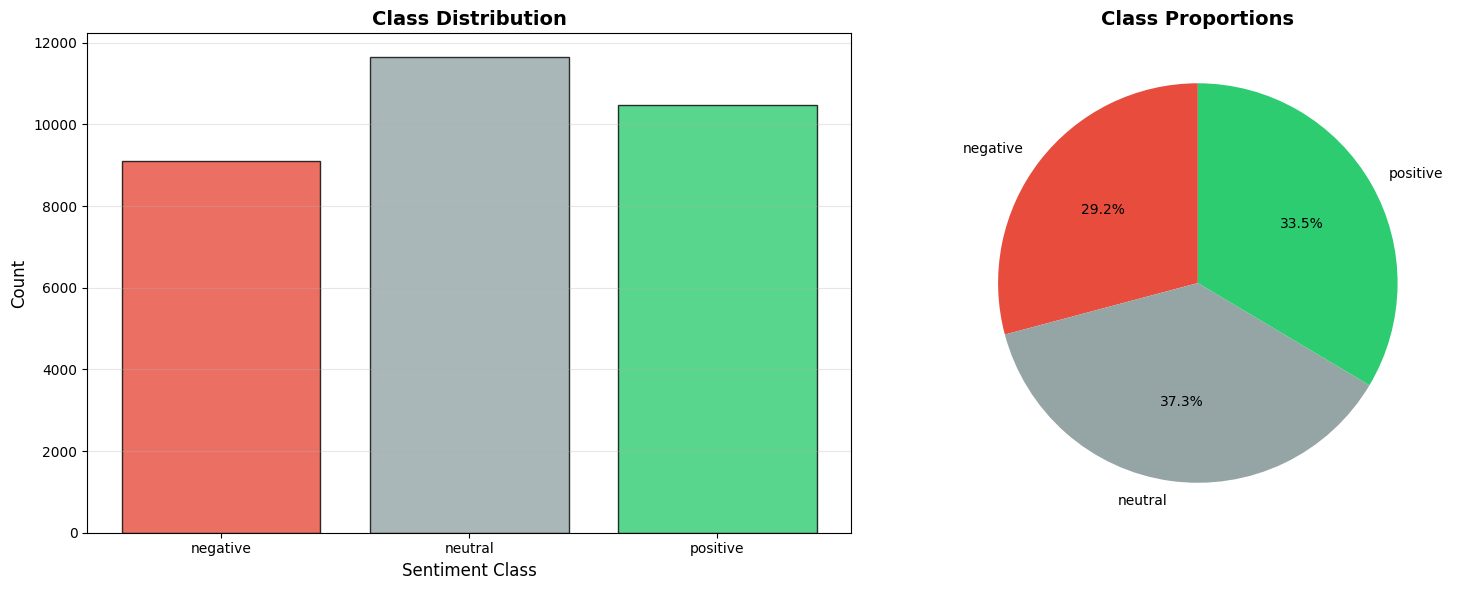


📊 4. TEXT LENGTH STATISTICS (RAW)
----------------------------------------------------------------------
Character Length:
count    31232.000000
mean        95.981013
std         95.064104
min          1.000000
25%         41.000000
50%         72.000000
75%        115.000000
max       2176.000000
Name: raw_char_length, dtype: float64

Word Count:
count    31232.000000
mean        18.025166
std         17.843542
min          1.000000
25%          8.000000
50%         13.000000
75%         21.000000
max        391.000000
Name: raw_word_count, dtype: float64


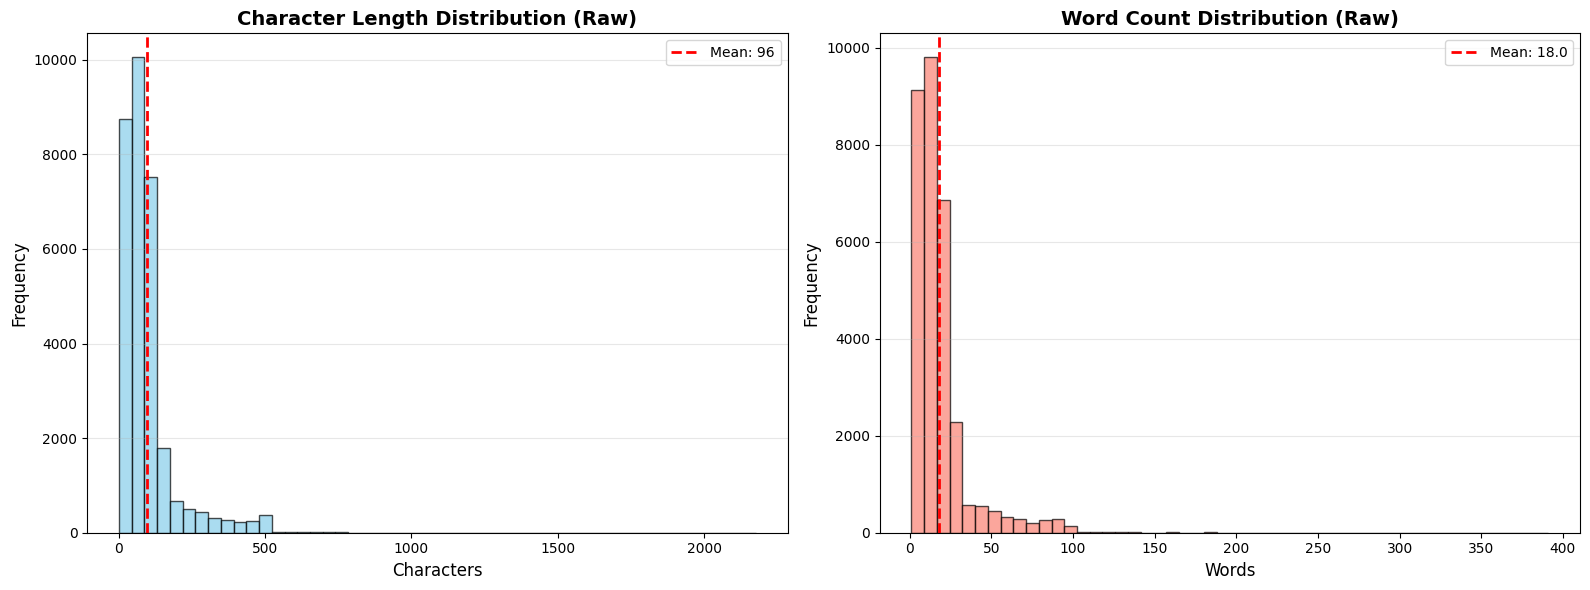


📊 5. TEXT LENGTH BY CLASS
----------------------------------------------------------------------


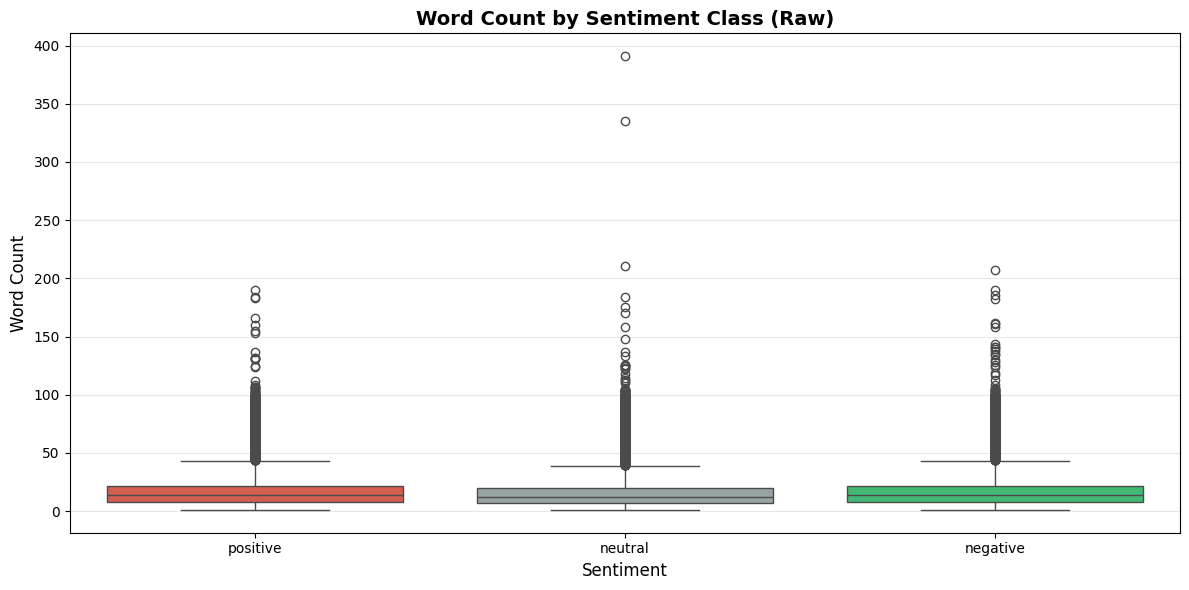


📊 6. WORD FREQUENCY ANALYSIS (RAW)
----------------------------------------------------------------------
Top 20 most frequent words (raw text):
i                        : 19,888
the                      : 17,981
to                       : 17,853
a                        : 11,374
and                      : 10,059
it                       : 8,393
my                       : 7,568
is                       : 7,145
for                      : 6,768
you                      : 5,889
of                       : 5,617
in                       : 5,232
but                      : 4,689
this                     : 4,420
have                     : 4,275
on                       : 4,159
that                     : 4,083
app                      : 3,761
not                      : 3,550
so                       : 3,493


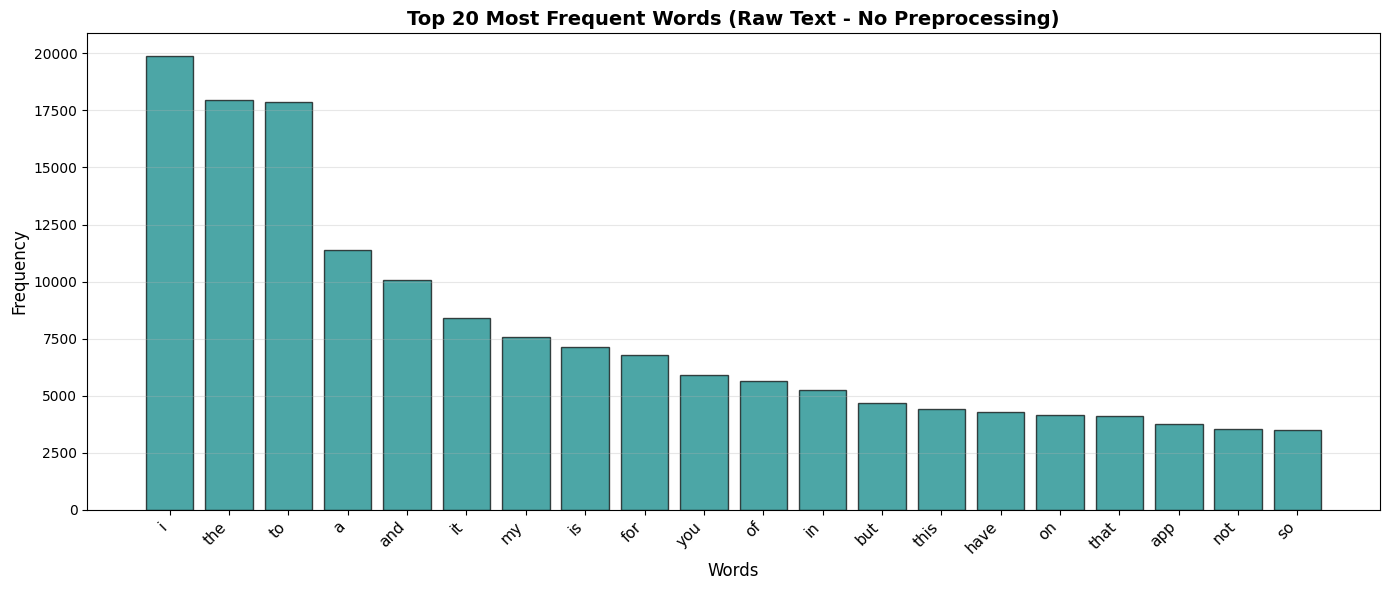


📊 7. BIGRAM ANALYSIS (RAW)
----------------------------------------------------------------------
Top 20 bigrams:
i have                             : 1,436
in the                             : 1,184
the app                            : 1,134
this app                           : 1,065
to be                              : 956
of the                             : 943
for the                            : 875
have to                            : 838
to the                             : 817
i love                             : 806
i am                               : 790
and i                              : 777
but i                              : 774
on the                             : 744
going to                           : 709
have a                             : 694
to do                              : 685
i was                              : 636
want to                            : 614
i can                              : 612

📊 8. WORD CLOUD (RAW TEXT)
-----------------------------

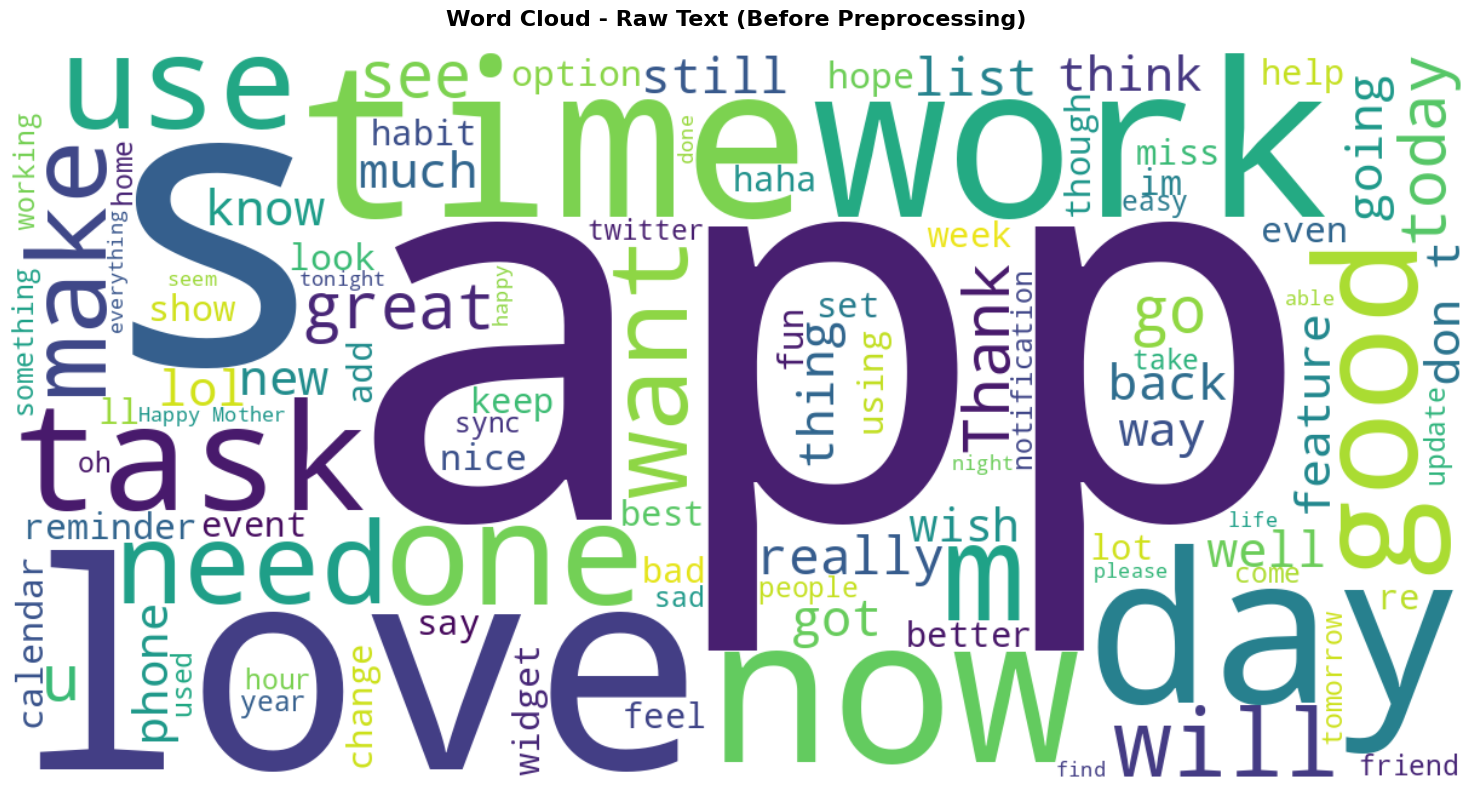


📊 9. SAMPLE RAW TEXTS BY CLASS
----------------------------------------------------------------------

CLASS: NEGATIVE (label=0)

Example:  That sucks to hear. I hate days like that

Example:  That would panic me a little!  Maybe you can read on an orbitron at the gym like I do...when all else fails?!?

Example: Is sad when people`s phones are dead

CLASS: NEUTRAL (label=1)

Example: Any plans of allowing sub tasks to show up in the widget?

Example:  naw idk what ur talkin about

Example:  whatever do you mean?

CLASS: POSITIVE (label=2)

Example: Cooking microwave pizzas, yummy

Example:  I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha

Example:  Umm yeah. That`s probably a pretty good note to self because eeeeeewwwwwwww.

✅ EDA PART 1 COMPLETE - NO PREPROCESSING APPLIED!


In [5]:
# ===================================================================
# EXPLORATORY DATA ANALYSIS - PART 1 (RAW DATA - NO PREPROCESSING)
# ===================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import nltk
from nltk.util import ngrams
import warnings
warnings.filterwarnings('ignore')

nltk.download('punkt', quiet=True)

print("="*70)
print("EXPLORATORY DATA ANALYSIS - RAW DATA (BEFORE ANY PREPROCESSING)")
print("="*70)

# ===================================================================
# 1. DATASET OVERVIEW
# ===================================================================
print("\n📊 1. DATASET OVERVIEW")
print("-"*70)
print(f"Training samples: {len(train_df):,}")
print(f"Validation samples: {len(val_df):,}")
print(f"Test samples: {len(test_df):,}")
print(f"Columns: {list(train_df.columns)}")
print(f"\nTraining shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")

# ===================================================================
# 2. MISSING VALUES
# ===================================================================
print("\n📊 2. MISSING VALUES")
print("-"*70)
print(train_df.isnull().sum())
if train_df.isnull().sum().sum() == 0:
    print("✅ No missing values in training set!")

# ===================================================================
# 3. CLASS DISTRIBUTION
# ===================================================================
print("\n📊 3. CLASS DISTRIBUTION")
print("-"*70)
class_counts = train_df['label'].value_counts().sort_index()
label_names = {0: 'negative', 1: 'neutral', 2: 'positive'}
print(f"Unique classes: {train_df['label'].nunique()}")
print(f"\n{class_counts}")

# Imbalance
imbalance_ratio = class_counts.max() / class_counts.min()
print(f"\nImbalance ratio: {imbalance_ratio:.2f}")

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.bar(class_counts.index, class_counts.values, color=['#e74c3c', '#95a5a6', '#2ecc71'], 
        edgecolor='black', alpha=0.8)
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['negative', 'neutral', 'positive'])
ax1.set_title('Class Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment Class', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.grid(axis='y', alpha=0.3)

colors = ['#e74c3c', '#95a5a6', '#2ecc71']
ax2.pie(class_counts, labels=['negative', 'neutral', 'positive'], autopct='%1.1f%%', 
        startangle=90, colors=colors)
ax2.set_title('Class Proportions', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# ===================================================================
# 4. TEXT LENGTH ANALYSIS (RAW)
# ===================================================================
print("\n📊 4. TEXT LENGTH STATISTICS (RAW)")
print("-"*70)

train_df['raw_char_length'] = train_df['text'].str.len()
train_df['raw_word_count'] = train_df['text'].apply(lambda x: len(str(x).split()))

print("Character Length:")
print(train_df['raw_char_length'].describe())
print("\nWord Count:")
print(train_df['raw_word_count'].describe())

# Visualize
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(train_df['raw_char_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
ax1.axvline(train_df['raw_char_length'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Mean: {train_df['raw_char_length'].mean():.0f}")
ax1.set_title('Character Length Distribution (Raw)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Characters', fontsize=12)
ax1.set_ylabel('Frequency', fontsize=12)
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

ax2.hist(train_df['raw_word_count'], bins=50, color='salmon', edgecolor='black', alpha=0.7)
ax2.axvline(train_df['raw_word_count'].mean(), color='red', linestyle='--',
            linewidth=2, label=f"Mean: {train_df['raw_word_count'].mean():.1f}")
ax2.set_title('Word Count Distribution (Raw)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Words', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.legend()
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================================================
# 5. TEXT LENGTH BY CLASS
# ===================================================================
print("\n📊 5. TEXT LENGTH BY CLASS")
print("-"*70)

# Add sentiment names for better visualization
train_df['sentiment_name'] = train_df['label'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

plt.figure(figsize=(12, 6))
sns.boxplot(x='sentiment_name', y='raw_word_count', data=train_df, 
            palette=['#e74c3c', '#95a5a6', '#2ecc71'])
plt.title('Word Count by Sentiment Class (Raw)', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Word Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===================================================================
# 6. WORD FREQUENCY (RAW - includes stopwords, emojis, everything)
# ===================================================================
print("\n📊 6. WORD FREQUENCY ANALYSIS (RAW)")
print("-"*70)

all_text = ' '.join(train_df['text'].astype(str)).lower()
all_words = all_text.split()
word_freq = Counter(all_words).most_common(20)

print("Top 20 most frequent words (raw text):")
for word, freq in word_freq:
    print(f"{word:25s}: {freq:,}")

# Visualize
words, freqs = zip(*word_freq)
plt.figure(figsize=(14, 6))
plt.bar(range(len(words)), freqs, color='teal', edgecolor='black', alpha=0.7)
plt.xticks(range(len(words)), words, rotation=45, ha='right', fontsize=11)
plt.title('Top 20 Most Frequent Words (Raw Text - No Preprocessing)', fontsize=14, fontweight='bold')
plt.xlabel('Words', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

# ===================================================================
# 7. BIGRAM ANALYSIS (RAW)
# ===================================================================
print("\n📊 7. BIGRAM ANALYSIS (RAW)")
print("-"*70)

bigrams_list = []
for text in train_df['text']:
    words = str(text).lower().split()
    bigrams_list.extend(list(ngrams(words, 2)))

bigram_freq = Counter(bigrams_list).most_common(20)
print("Top 20 bigrams:")
for bigram, freq in bigram_freq:
    print(f"{' '.join(bigram):35s}: {freq:,}")

# ===================================================================
# 8. WORD CLOUD (RAW - with stopwords, special chars, everything)
# ===================================================================
print("\n📊 8. WORD CLOUD (RAW TEXT)")
print("-"*70)

wordcloud = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(' '.join(train_df['text'].astype(str)))

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Raw Text (Before Preprocessing)', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# ===================================================================
# 9. SAMPLE RAW TEXTS BY CLASS
# ===================================================================
print("\n📊 9. SAMPLE RAW TEXTS BY CLASS")
print("-"*70)

for label in [0, 1, 2]:
    sentiment = label_names[label]
    samples = train_df[train_df['label'] == label].head(3)
    
    print(f"\n{'='*70}")
    print(f"CLASS: {sentiment.upper()} (label={label})")
    print(f"{'='*70}")
    
    for idx, row in samples.iterrows():
        print(f"\nExample: {row['text']}")

print("\n" + "="*70)
print("✅ EDA PART 1 COMPLETE - NO PREPROCESSING APPLIED!")
print("="*70)


COMPLETE PREPROCESSING FOR SENTIMENT ANALYSIS
✅ Stopwords adjusted: 22 negation words preserved

Pre-processing data validation...
✅ Text column converted to string type
   train_df['text'].dtype: object
   val_df['text'].dtype: object
   test_df['text'].dtype: object

Applying preprocessing to all splits...

🔍 Checking for emojis in training data...

📊 Emoji Statistics:
   Texts with emojis: 291 (0.9%)
   Total emojis: 1,654

🔍 Checking for hashtags...
   Texts with hashtags: 490 (1.6%)

🔹 Creating 'clean_text_light' (for transformers)...
✅ Train/Val/Test 'clean_text_light' complete

🔹 Creating 'clean_text_tfidf' (for TF-IDF + LR)...
✅ Train/Val/Test 'clean_text_tfidf' complete

✅ PREPROCESSING COMPLETE!

PREPROCESSING EXAMPLES

EXAMPLE: NEGATIVE (label=0)

🔴 ORIGINAL:
    That sucks to hear. I hate days like that

🟡 LIGHT (Transformers):
   that sucks to hear. i hate days like that

🟢 TRADITIONAL (TF-IDF):
   suck hear hate day like

EXAMPLE: NEUTRAL (label=1)

🔴 ORIGINAL:
   Any pla

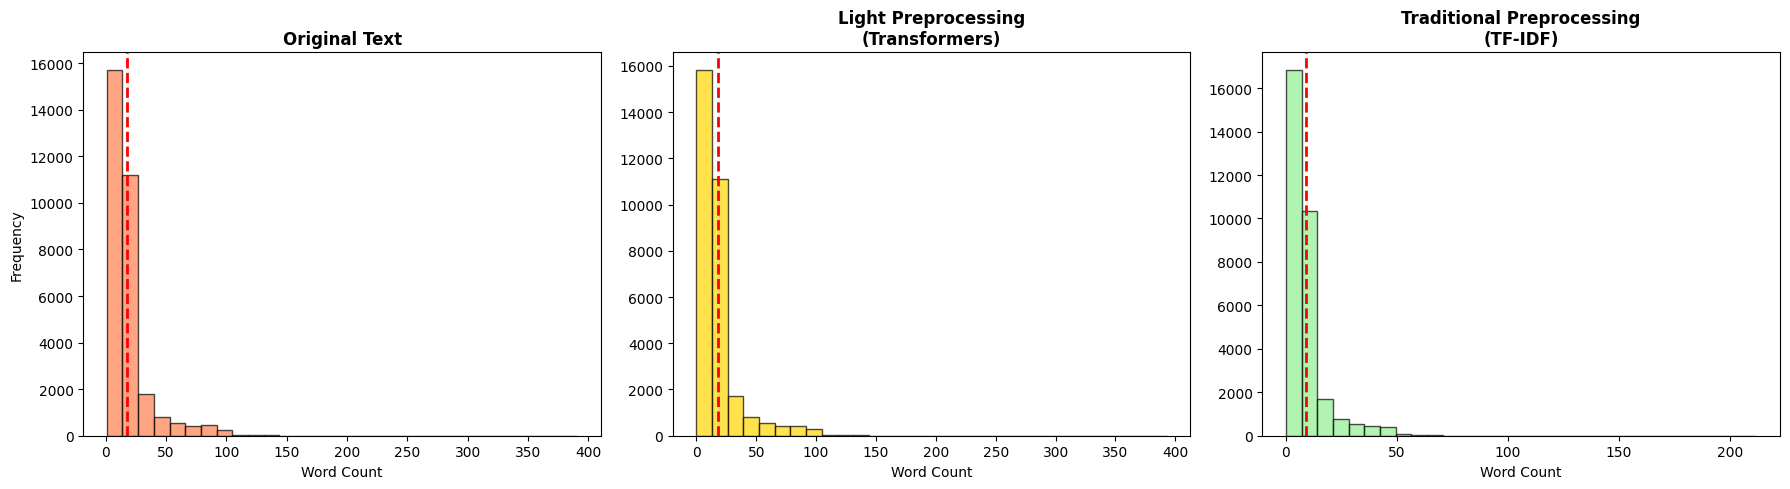


✅  DATA PREPARATION COMPLETE!

📊 Final Summary:
   - Training samples: 31,232
   - Validation samples: 5,205
   - Test samples: 5,206

✅ Two clean text columns ready:
   1. 'clean_text_light' → for BERT/RoBERTa/DistilBERT
   2. 'clean_text_tfidf' → for TF-IDF + Logistic Regression


In [6]:
# ===================================================================
# COMPLETE PREPROCESSING FOR SENTIMENT ANALYSIS (FIXED)
# ===================================================================

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nltk
import pandas as pd
import numpy as np

print("="*70)
print("COMPLETE PREPROCESSING FOR SENTIMENT ANALYSIS")
print("="*70)

# Download necessary NLTK data
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('punkt', quiet=True)

# Initialize
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# CRITICAL: Remove negation words from stopwords (preserve sentiment)
negation_words = {'not', 'no', 'nor', 'neither', 'never', 'none', 
                  'nothing', 'nobody', 'nowhere', "n't", "don't", 
                  "doesn't", "didn't", "won't", "wouldn't", "shouldn't",
                  "can't", "couldn't", "isn't", "aren't", "wasn't", "weren't"}

stop_words = stop_words - negation_words

print(f"✅ Stopwords adjusted: {len(negation_words)} negation words preserved")

# ===================================================================
# FORCE TEXT COLUMN TO STRING (FIX FOR FLOAT ISSUE)
# ===================================================================

print("\n" + "="*70)
print("Pre-processing data validation...")
print("="*70)

# Ensure text is string everywhere (THIS IS THE KEY FIX)
train_df['text'] = train_df['text'].astype(str)
val_df['text']   = val_df['text'].astype(str)
test_df['text']  = test_df['text'].astype(str)

print(f"✅ Text column converted to string type")
print(f"   train_df['text'].dtype: {train_df['text'].dtype}")
print(f"   val_df['text'].dtype: {val_df['text'].dtype}")
print(f"   test_df['text'].dtype: {test_df['text'].dtype}")

# ===================================================================
# MANUAL CONTRACTION DICTIONARY
# ===================================================================

contractions_dict = {
    # negative contractions
    "don't": "do not", "doesn't": "does not", "didn't": "did not",
    "won't": "will not", "wouldn't": "would not", "shouldn't": "should not",
    "can't": "can not", "couldn't": "could not", "isn't": "is not",
    "aren't": "are not", "wasn't": "was not", "weren't": "were not",
    "haven't": "have not", "hasn't": "has not", "hadn't": "had not",
    "mightn't": "might not", "mustn't": "must not", "needn't": "need not",
    
    # positive contractions
    "i'm": "i am", "you're": "you are", "he's": "he is", "she's": "she is",
    "it's": "it is", "we're": "we are", "they're": "they are",
    "i've": "i have", "you've": "you have", "we've": "we have", "they've": "they have",
    "i'll": "i will", "you'll": "you will", "he'll": "he will", "she'll": "she will",
    "it'll": "it will", "we'll": "we will", "they'll": "they will",
    "i'd": "i would", "you'd": "you would", "he'd": "he would", "she'd": "she would",
    "it'd": "it would", "we'd": "we would", "they'd": "they would",
}

def expand_contractions_manual(text):
    """Expand contractions using manual dictionary"""
    text = str(text).lower()  # DEFENSIVE: force to string
    for contraction, expansion in contractions_dict.items():
        text = re.sub(r'\b' + contraction + r'\b', expansion, text)
    return text

# ===================================================================
# HELPER FUNCTIONS
# ===================================================================

def has_emoji(text):
    """Check if text contains any emojis (simple Unicode check)"""
    text = str(text)  # DEFENSIVE
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags
        u"\U0001F900-\U0001F9FF"  # supplemental symbols
        u"\U00002600-\U000027BF"  # misc symbols
        u"\U0001FA00-\U0001FA6F"  # chess symbols
        "]+", flags=re.UNICODE)
    return bool(emoji_pattern.search(text))

def count_emojis(text):
    """Count emojis in text"""
    text = str(text)  # DEFENSIVE
    count = 0
    for char in text:
        if ord(char) > 127:
            count += 1
    return min(count, 10)

def handle_hashtags(text):
    """Extract text from hashtags: #GreatProduct → great product"""
    text = str(text)  # DEFENSIVE
    def split_hashtag(match):
        tag = match.group(1)
        split_tag = re.sub(r'([a-z])([A-Z])', r'\1 \2', tag)
        return split_tag
    
    text = re.sub(r'#(\w+)', split_hashtag, text)
    return text

def reduce_repeated_chars(text):
    """Reduce repeated characters: soooo → soo (max 2 repeats)"""
    text = str(text)  # DEFENSIVE
    text = re.sub(r'(.)\1{2,}', r'\1\1', text)
    return text

def handle_numbers(text, keep_numbers=False):
    """Remove standalone numbers but keep number-word combinations"""
    text = str(text)  # DEFENSIVE
    if keep_numbers:
        return text
    text = re.sub(r'\b\d+\b', '', text)
    return text

def emoji_to_text(text):
    """Convert emoji to text description (simple mapping)"""
    text = str(text)  # DEFENSIVE
    emoji_map = {
        "😊": "smiling_face", "😍": "heart_eyes", "😂": "laughing", "❤️": "heart",
        "😭": "crying", "🔥": "fire", "👍": "thumbs_up", "👎": "thumbs_down",
        "😤": "angry", "😱": "shocked", "😔": "sad", "😒": "annoyed",
        "🎉": "celebration", "✨": "sparkle", "💯": "100", "🙌": "raised_hands",
    }
    for emoji, text_desc in emoji_map.items():
        text = text.replace(emoji, f" {text_desc} ")
    return text

# ===================================================================
# LIGHT PREPROCESSING (for Transformers)
# ===================================================================

def preprocess_light(text):
    """Minimal preprocessing for transformer models"""
    # DEFENSIVE: Force to string
    text = str(text)
    
    # 1. Expand contractions manually
    text = expand_contractions_manual(text)
    
    # 2. Handle hashtags
    text = handle_hashtags(text)
    
    # 3. Reduce repeated characters
    text = reduce_repeated_chars(text)
    
    # 4. Lowercase (already done in contractions expansion, but ensuring)
    text = text.lower()
    
    # 5. Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # 6. Remove mentions
    text = re.sub(r'@\w+', '', text)
    
    # 7. Handle numbers
    text = handle_numbers(text, keep_numbers=False)
    
    # 8. Normalize backticks
    text = text.replace('`', "'")
    
    # 9. Keep emojis as-is for transformers
    
    # 10. Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

# ===================================================================
# TRADITIONAL PREPROCESSING (for TF-IDF + Logistic Regression)
# ===================================================================

def preprocess_traditional(text):
    """Full preprocessing for TF-IDF + Logistic Regression"""
    # DEFENSIVE: Force to string
    text = str(text)
    
    # 1. Convert emojis to text
    text = emoji_to_text(text)
    
    # 2. Expand contractions
    text = expand_contractions_manual(text)
    
    # 3. Handle hashtags
    text = handle_hashtags(text)
    
    # 4. Reduce repeated characters
    text = reduce_repeated_chars(text)
    
    # 5. Lowercase
    text = text.lower()
    
    # 6. Remove URLs and mentions
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    
    # 7. Handle numbers
    text = handle_numbers(text, keep_numbers=False)
    
    # 8. Remove special characters (keep spaces and underscores)
    text = re.sub(r'[^a-z\s_]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # 9. Tokenize
    words = text.split()
    
    # 10. Remove stopwords (except negations) and filter short words
    words = [word for word in words if word not in stop_words and len(word) > 2]
    
    # 11. Lemmatize
    words = [lemmatizer.lemmatize(word) for word in words]
    
    return ' '.join(words)

# ===================================================================
# APPLY PREPROCESSING
# ===================================================================

print("\n" + "="*70)
print("Applying preprocessing to all splits...")
print("="*70)

# Check for emojis and hashtags
print("\n🔍 Checking for emojis in training data...")
train_df['has_emoji'] = train_df['text'].apply(has_emoji)
train_df['emoji_count'] = train_df['text'].apply(count_emojis)

emoji_stats = train_df['has_emoji'].value_counts()
total_emojis = train_df['emoji_count'].sum()

print(f"\n📊 Emoji Statistics:")
print(f"   Texts with emojis: {emoji_stats.get(True, 0):,} ({emoji_stats.get(True, 0)/len(train_df)*100:.1f}%)")
print(f"   Total emojis: {total_emojis:,}")

print("\n🔍 Checking for hashtags...")
train_df['has_hashtag'] = train_df['text'].str.contains(r'#\w+', regex=True)
hashtag_count = train_df['has_hashtag'].sum()
print(f"   Texts with hashtags: {hashtag_count:,} ({hashtag_count/len(train_df)*100:.1f}%)")

# Apply preprocessing
print("\n🔹 Creating 'clean_text_light' (for transformers)...")
train_df['clean_text_light'] = train_df['text'].apply(preprocess_light)
val_df['clean_text_light'] = val_df['text'].apply(preprocess_light)
test_df['clean_text_light'] = test_df['text'].apply(preprocess_light)

print("✅ Train/Val/Test 'clean_text_light' complete")

print("\n🔹 Creating 'clean_text_tfidf' (for TF-IDF + LR)...")
train_df['clean_text_tfidf'] = train_df['text'].apply(preprocess_traditional)
val_df['clean_text_tfidf'] = val_df['text'].apply(preprocess_traditional)
test_df['clean_text_tfidf'] = test_df['text'].apply(preprocess_traditional)

print("✅ Train/Val/Test 'clean_text_tfidf' complete")

print("\n" + "="*70)
print("✅ PREPROCESSING COMPLETE!")
print("="*70)

# ===================================================================
# BEFORE/AFTER EXAMPLES
# ===================================================================

print("\n" + "="*70)
print("PREPROCESSING EXAMPLES")
print("="*70)

for label in [0, 1, 2]:
    sentiment_name = {0: 'NEGATIVE', 1: 'NEUTRAL', 2: 'POSITIVE'}[label]
    sample = train_df[train_df['label'] == label].iloc[0]
    
    print(f"\n{'='*70}")
    print(f"EXAMPLE: {sentiment_name} (label={label})")
    print(f"{'='*70}")
    
    print(f"\n🔴 ORIGINAL:")
    print(f"   {sample['text']}")
    
    print(f"\n🟡 LIGHT (Transformers):")
    print(f"   {sample['clean_text_light']}")
    
    print(f"\n🟢 TRADITIONAL (TF-IDF):")
    print(f"   {sample['clean_text_tfidf']}")

# ===================================================================
# TEXT LENGTH COMPARISON
# ===================================================================

print("\n" + "="*70)
print("TEXT LENGTH AFTER PREPROCESSING")
print("="*70)

train_df['light_word_count'] = train_df['clean_text_light'].apply(lambda x: len(str(x).split()))
train_df['tfidf_word_count'] = train_df['clean_text_tfidf'].apply(lambda x: len(str(x).split()))

print("\n🔴 ORIGINAL:")
print(train_df['raw_word_count'].describe())

print("\n🟡 LIGHT PREPROCESSING:")
print(train_df['light_word_count'].describe())

print("\n🟢 TRADITIONAL PREPROCESSING:")
print(train_df['tfidf_word_count'].describe())

# Visualize
import matplotlib.pyplot as plt

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

ax1.hist(train_df['raw_word_count'], bins=30, color='coral', alpha=0.7, edgecolor='black')
ax1.axvline(train_df['raw_word_count'].mean(), color='red', linestyle='--', linewidth=2)
ax1.set_title('Original Text', fontweight='bold')
ax1.set_xlabel('Word Count')
ax1.set_ylabel('Frequency')

ax2.hist(train_df['light_word_count'], bins=30, color='gold', alpha=0.7, edgecolor='black')
ax2.axvline(train_df['light_word_count'].mean(), color='red', linestyle='--', linewidth=2)
ax2.set_title('Light Preprocessing\n(Transformers)', fontweight='bold')
ax2.set_xlabel('Word Count')

ax3.hist(train_df['tfidf_word_count'], bins=30, color='lightgreen', alpha=0.7, edgecolor='black')
ax3.axvline(train_df['tfidf_word_count'].mean(), color='red', linestyle='--', linewidth=2)
ax3.set_title('Traditional Preprocessing\n(TF-IDF)', fontweight='bold')
ax3.set_xlabel('Word Count')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("✅  DATA PREPARATION COMPLETE!")
print("="*70)
print(f"\n📊 Final Summary:")
print(f"   - Training samples: {len(train_df):,}")
print(f"   - Validation samples: {len(val_df):,}")
print(f"   - Test samples: {len(test_df):,}")
print(f"\n✅ Two clean text columns ready:")
print(f"   1. 'clean_text_light' → for BERT/RoBERTa/DistilBERT")
print(f"   2. 'clean_text_tfidf' → for TF-IDF + Logistic Regression")



EDA PART 2: IMPACT OF PREPROCESSING

📊 1. TEXT LENGTH SUMMARY
----------------------------------------------------------------------
🔴 BEFORE (Raw):
  Avg characters: 96.0
  Avg words     : 18.0

🟡 AFTER (Light - Transformers):
  Avg characters: 93.6
  Avg words     : 18.1

🟢 AFTER (Traditional - TF-IDF):
  Avg characters: 57.7
  Avg words     : 9.3

📉 Reduction from Raw:
  Light preprocessing: 0.2% increase
  TF-IDF preprocessing: 48.5% reduction

📊 2. VISUAL COMPARISON
----------------------------------------------------------------------


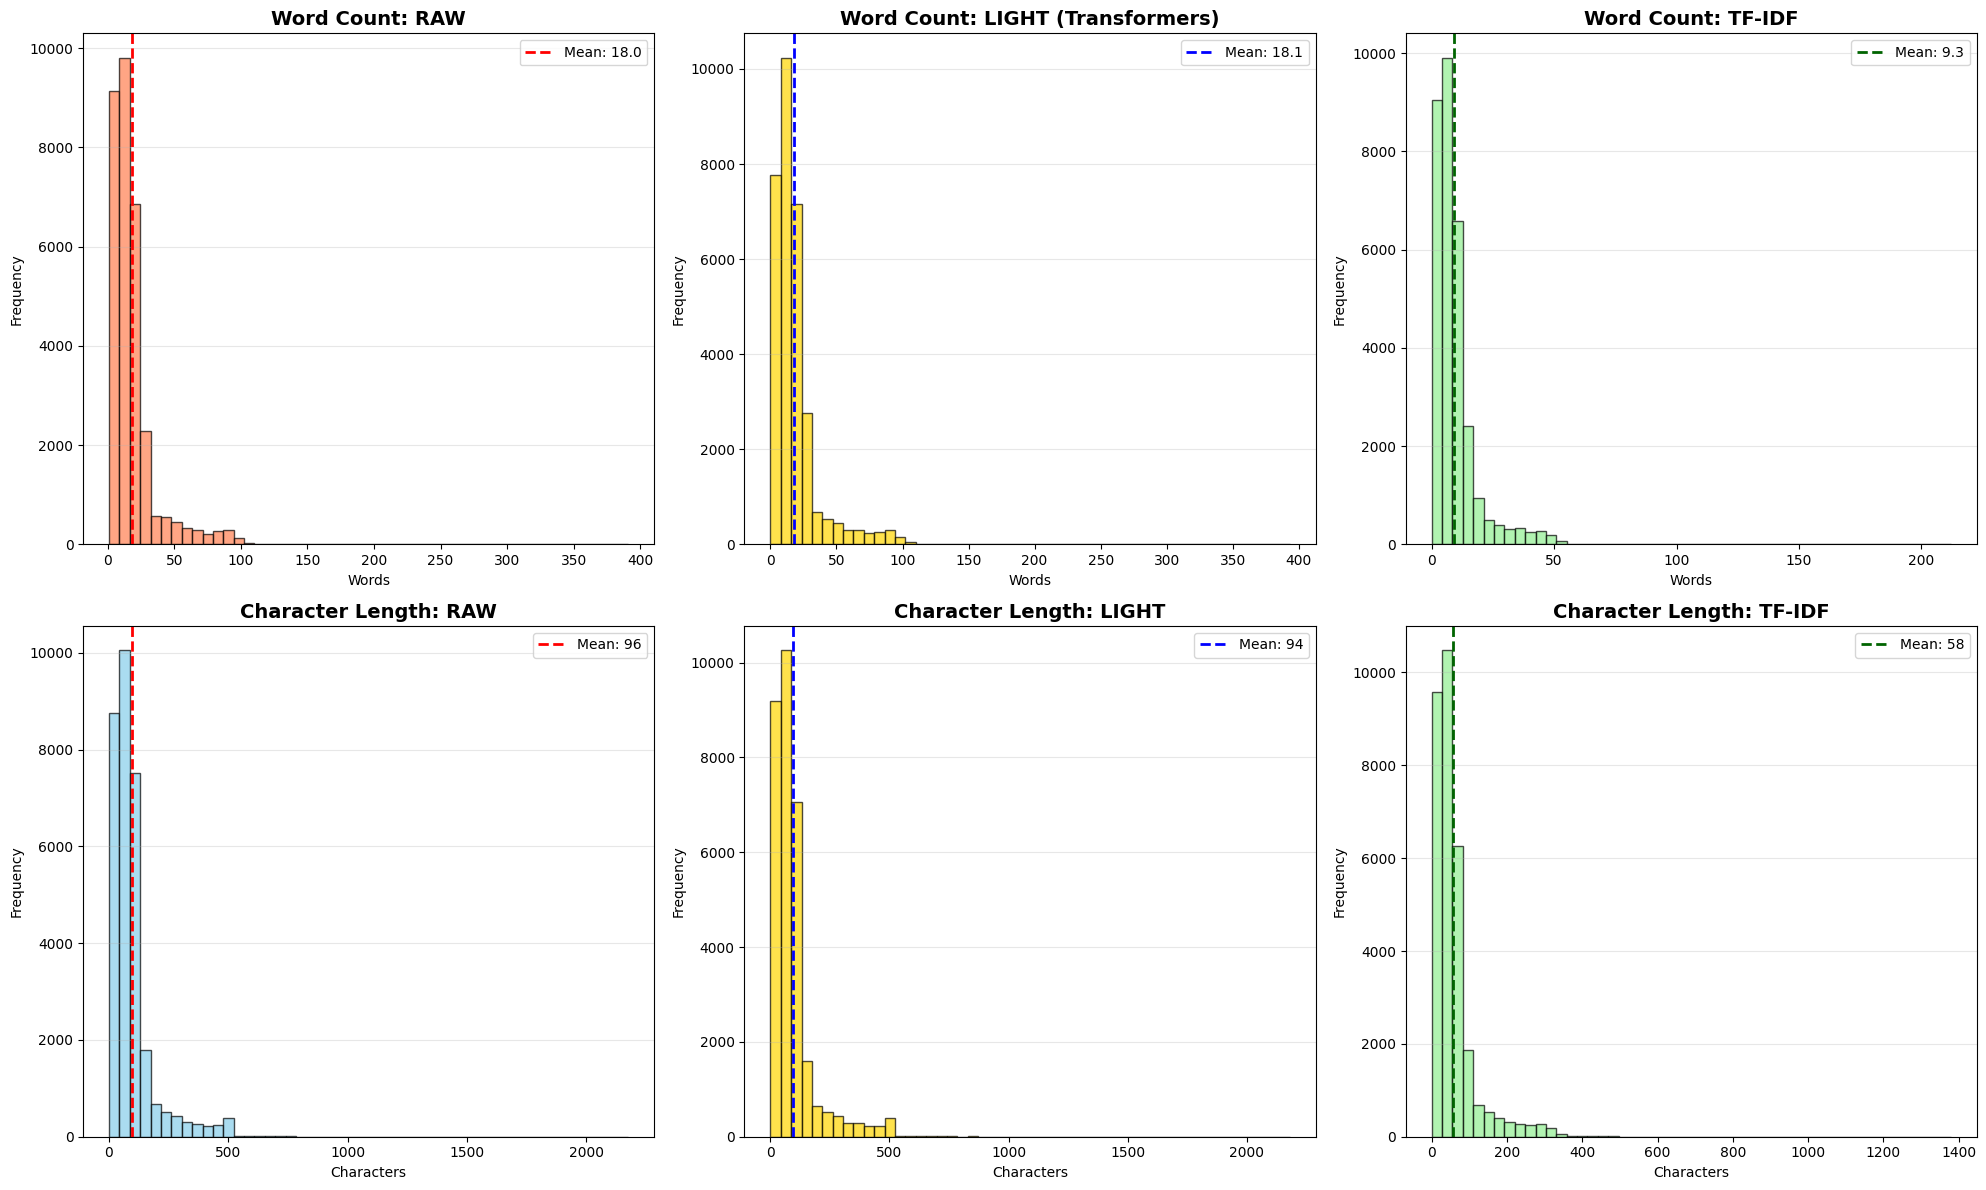


📊 3. VOCABULARY SIZE
----------------------------------------------------------------------
🔴 Raw vocabulary      : 53,176 unique words
🟡 Light vocabulary    : 49,127 unique words
🟢 TF-IDF vocabulary   : 22,856 unique words

📉 Vocabulary reduction:
   Light : 7.6% reduction
   TF-IDF: 57.0% reduction

📊 4. TOP 20 WORDS AFTER PREPROCESSING
----------------------------------------------------------------------

🟡 LIGHT PREPROCESSING (Transformers):
  i                   : 21,162
  the                 : 17,981
  to                  : 17,853
  a                   : 11,374
  and                 : 10,059
  it                  : 9,611
  is                  : 8,452
  my                  : 7,568
  for                 : 6,768
  not                 : 6,054
  you                 : 6,035
  of                  : 5,617
  in                  : 5,232
  have                : 4,829
  but                 : 4,689
  this                : 4,420
  on                  : 4,159
  that                : 4,083
  a

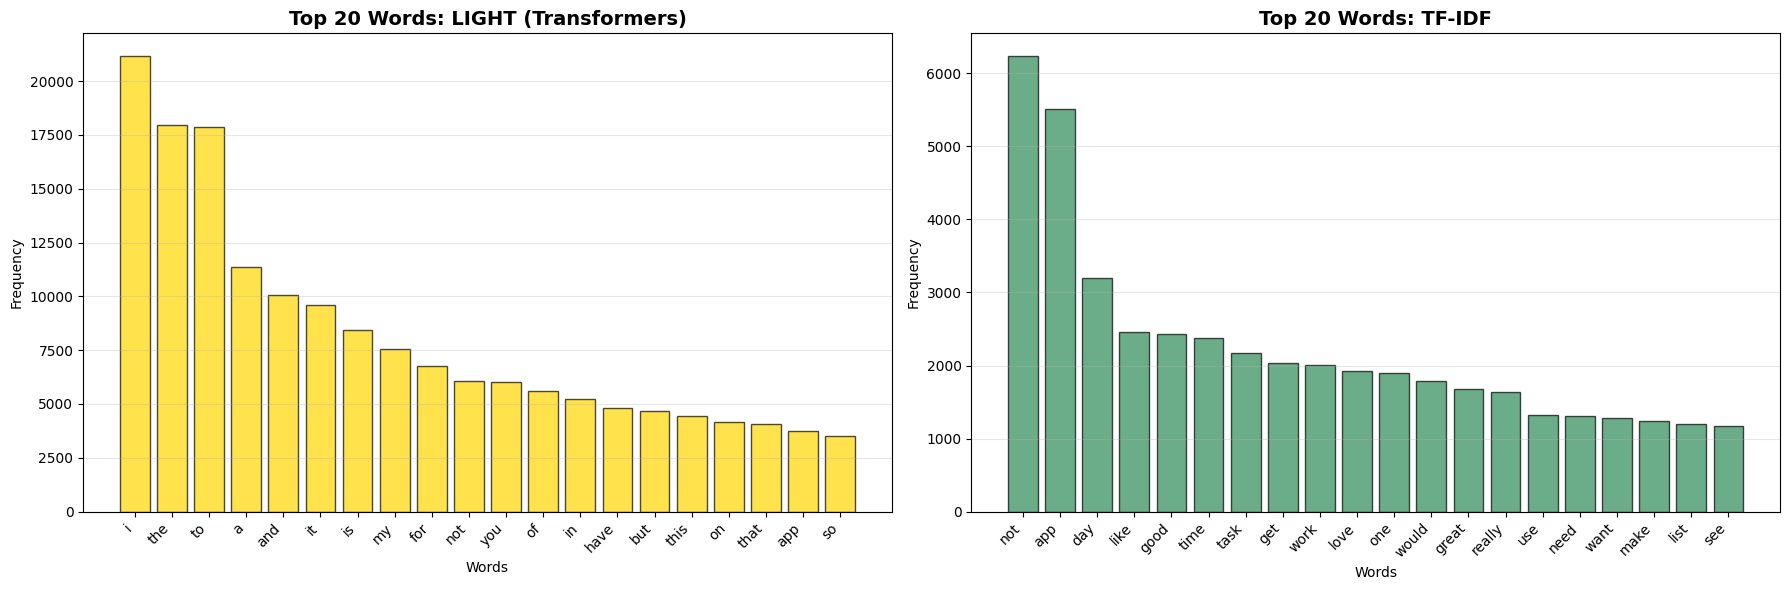


📊 5. WORD CLOUDS
----------------------------------------------------------------------


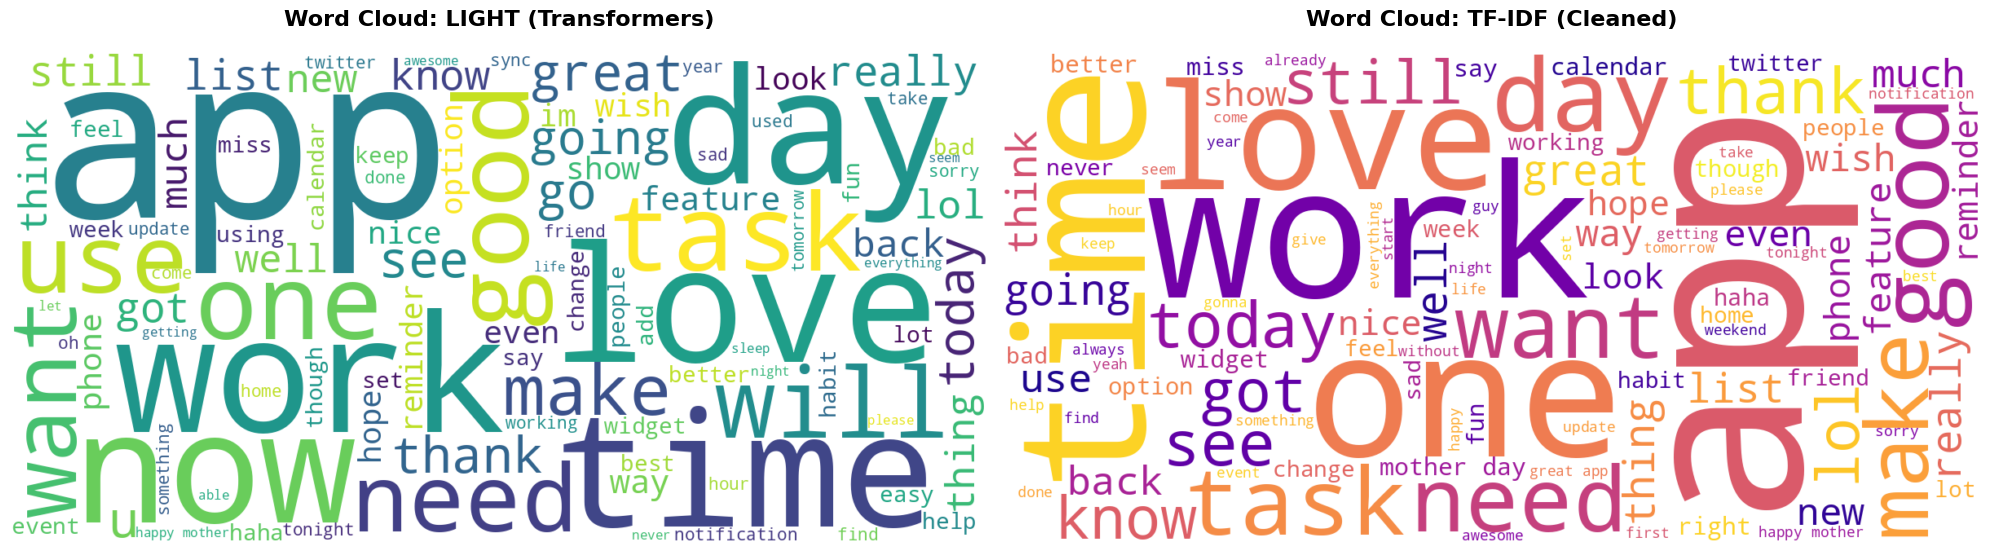


📊 6. WORD COUNT BY SENTIMENT (AFTER PREPROCESSING)
----------------------------------------------------------------------


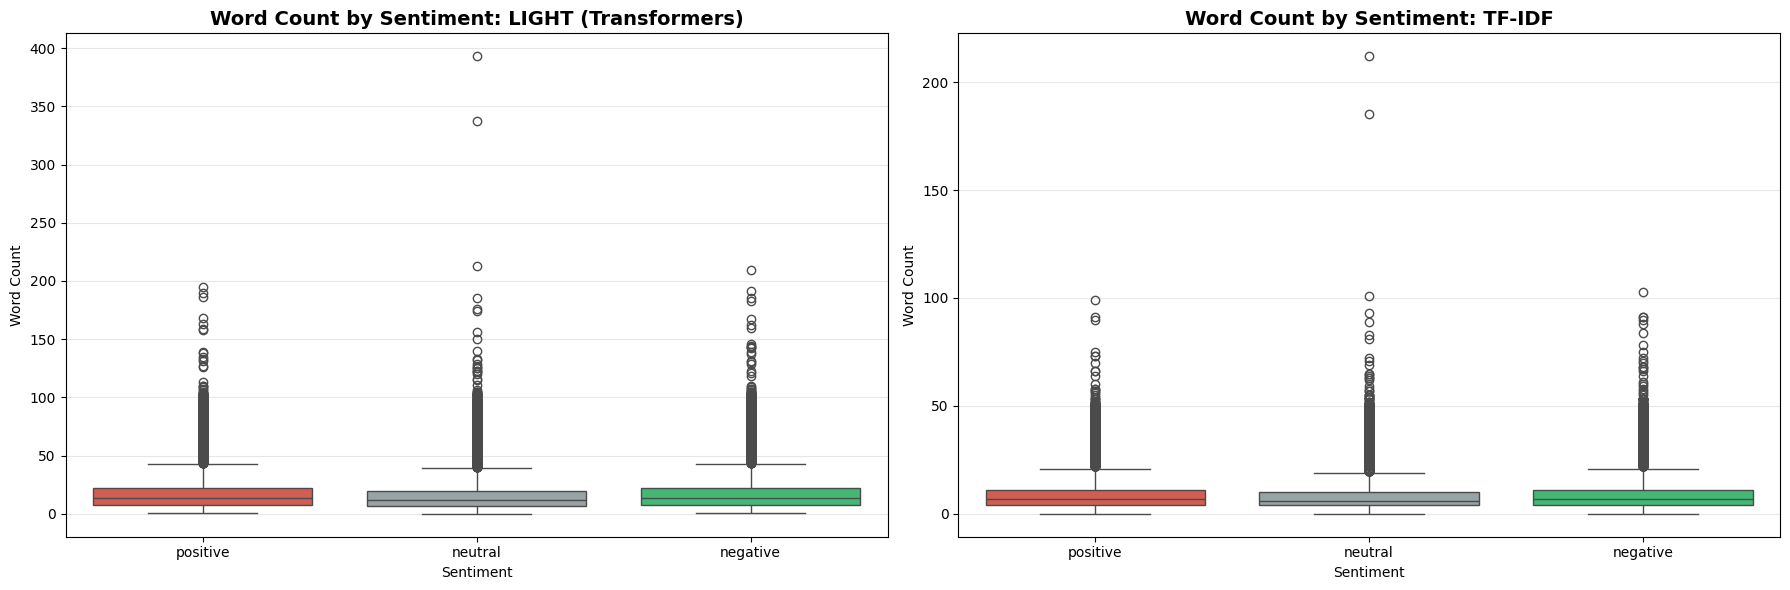


✅ EDA PART 2 COMPLETE!

📋 KEY INSIGHTS:
----------------------------------------------------------------------

1️⃣ TEXT LENGTH:
   Raw       : 18.0 words
   Light     : 18.1 words (minimal change ✅)
   TF-IDF    : 9.3 words (48.5% reduction ✅)

2️⃣ VOCABULARY:
   Raw       : 53,176 unique words
   Light     : 49,127 unique words
   TF-IDF    : 22,856 unique words (57.0% reduction ✅)

3️⃣ PREPROCESSING EFFECTIVENESS:
   ✅ Light: Context preserved (stopwords, punctuation kept)
   ✅ TF-IDF: Aggressive cleaning (stopwords removed, lemmatized)
   ✅ Negations preserved in both pipelines
   ✅ Emojis handled appropriately for each model type

📊 COMPLETE: EDA + PREPROCESSING DONE!


In [7]:
# ===================================================================
# EDA PART 2: AFTER PREPROCESSING (Impact Comparison)
# ===================================================================

import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud

print("="*70)
print("EDA PART 2: IMPACT OF PREPROCESSING")
print("="*70)

# ===================================================================
# 1. TEXT LENGTH SUMMARY (BEFORE vs AFTER - Both Pipelines)
# ===================================================================

print("\n📊 1. TEXT LENGTH SUMMARY")
print("-"*70)

print("🔴 BEFORE (Raw):")
print(f"  Avg characters: {train_df['raw_char_length'].mean():.1f}")
print(f"  Avg words     : {train_df['raw_word_count'].mean():.1f}")

print("\n🟡 AFTER (Light - Transformers):")
print(f"  Avg characters: {train_df['clean_text_light'].str.len().mean():.1f}")
print(f"  Avg words     : {train_df['light_word_count'].mean():.1f}")

print("\n🟢 AFTER (Traditional - TF-IDF):")
print(f"  Avg characters: {train_df['clean_text_tfidf'].str.len().mean():.1f}")
print(f"  Avg words     : {train_df['tfidf_word_count'].mean():.1f}")

# Calculate reductions
light_word_reduction = (1 - train_df['light_word_count'].mean() / train_df['raw_word_count'].mean()) * 100
tfidf_word_reduction = (1 - train_df['tfidf_word_count'].mean() / train_df['raw_word_count'].mean()) * 100

print("\n📉 Reduction from Raw:")
print(f"  Light preprocessing: {abs(light_word_reduction):.1f}% {'reduction' if light_word_reduction > 0 else 'increase'}")
print(f"  TF-IDF preprocessing: {tfidf_word_reduction:.1f}% reduction")

# ===================================================================
# 2. VISUAL COMPARISON: Raw vs Light vs TF-IDF
# ===================================================================

print("\n📊 2. VISUAL COMPARISON")
print("-"*70)

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# Row 1: Word count distributions
# Raw
axes[0, 0].hist(train_df['raw_word_count'], bins=50, color='coral', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(train_df['raw_word_count'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f"Mean: {train_df['raw_word_count'].mean():.1f}")
axes[0, 0].set_title('Word Count: RAW', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Words')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].legend()
axes[0, 0].grid(axis='y', alpha=0.3)

# Light
axes[0, 1].hist(train_df['light_word_count'], bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(train_df['light_word_count'].mean(), color='blue', linestyle='--',
                   linewidth=2, label=f"Mean: {train_df['light_word_count'].mean():.1f}")
axes[0, 1].set_title('Word Count: LIGHT (Transformers)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Words')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].legend()
axes[0, 1].grid(axis='y', alpha=0.3)

# TF-IDF
axes[0, 2].hist(train_df['tfidf_word_count'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[0, 2].axvline(train_df['tfidf_word_count'].mean(), color='darkgreen', linestyle='--',
                   linewidth=2, label=f"Mean: {train_df['tfidf_word_count'].mean():.1f}")
axes[0, 2].set_title('Word Count: TF-IDF', fontsize=14, fontweight='bold')
axes[0, 2].set_xlabel('Words')
axes[0, 2].set_ylabel('Frequency')
axes[0, 2].legend()
axes[0, 2].grid(axis='y', alpha=0.3)

# Row 2: Character length distributions
# Raw
axes[1, 0].hist(train_df['raw_char_length'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
axes[1, 0].axvline(train_df['raw_char_length'].mean(), color='red', linestyle='--',
                   linewidth=2, label=f"Mean: {train_df['raw_char_length'].mean():.0f}")
axes[1, 0].set_title('Character Length: RAW', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Characters')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# Light
light_char_len = train_df['clean_text_light'].str.len()
axes[1, 1].hist(light_char_len, bins=50, color='gold', edgecolor='black', alpha=0.7)
axes[1, 1].axvline(light_char_len.mean(), color='blue', linestyle='--',
                   linewidth=2, label=f"Mean: {light_char_len.mean():.0f}")
axes[1, 1].set_title('Character Length: LIGHT', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Characters')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(axis='y', alpha=0.3)

# TF-IDF
tfidf_char_len = train_df['clean_text_tfidf'].str.len()
axes[1, 2].hist(tfidf_char_len, bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1, 2].axvline(tfidf_char_len.mean(), color='darkgreen', linestyle='--',
                   linewidth=2, label=f"Mean: {tfidf_char_len.mean():.0f}")
axes[1, 2].set_title('Character Length: TF-IDF', fontsize=14, fontweight='bold')
axes[1, 2].set_xlabel('Characters')
axes[1, 2].set_ylabel('Frequency')
axes[1, 2].legend()
axes[1, 2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================================================
# 3. VOCABULARY SIZE COMPARISON
# ===================================================================

print("\n📊 3. VOCABULARY SIZE")
print("-"*70)

raw_vocab = set(' '.join(train_df['text'].astype(str)).lower().split())
light_vocab = set(' '.join(train_df['clean_text_light'].astype(str)).split())
tfidf_vocab = set(' '.join(train_df['clean_text_tfidf'].astype(str)).split())

print(f"🔴 Raw vocabulary      : {len(raw_vocab):,} unique words")
print(f"🟡 Light vocabulary    : {len(light_vocab):,} unique words")
print(f"🟢 TF-IDF vocabulary   : {len(tfidf_vocab):,} unique words")

light_reduction = (1 - len(light_vocab)/len(raw_vocab)) * 100
tfidf_reduction = (1 - len(tfidf_vocab)/len(raw_vocab)) * 100

print(f"\n📉 Vocabulary reduction:")
print(f"   Light : {abs(light_reduction):.1f}% {'reduction' if light_reduction > 0 else 'increase'}")
print(f"   TF-IDF: {tfidf_reduction:.1f}% reduction")

# ===================================================================
# 4. TOP 20 WORDS AFTER PREPROCESSING (Both Pipelines)
# ===================================================================

print("\n📊 4. TOP 20 WORDS AFTER PREPROCESSING")
print("-"*70)

# Light preprocessing
all_light_words = ' '.join(train_df['clean_text_light']).split()
light_word_freq = Counter(all_light_words).most_common(20)

# TF-IDF preprocessing
all_tfidf_words = ' '.join(train_df['clean_text_tfidf']).split()
tfidf_word_freq = Counter(all_tfidf_words).most_common(20)

print("\n🟡 LIGHT PREPROCESSING (Transformers):")
for word, freq in light_word_freq:
    print(f"  {word:20s}: {freq:,}")

print("\n🟢 TF-IDF PREPROCESSING:")
for word, freq in tfidf_word_freq:
    print(f"  {word:20s}: {freq:,}")

# Visualize side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Light
words_light, freqs_light = zip(*light_word_freq)
ax1.bar(range(len(words_light)), freqs_light, color='gold', edgecolor='black', alpha=0.7)
ax1.set_xticks(range(len(words_light)))
ax1.set_xticklabels(words_light, rotation=45, ha='right')
ax1.set_title('Top 20 Words: LIGHT (Transformers)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Words')
ax1.set_ylabel('Frequency')
ax1.grid(axis='y', alpha=0.3)

# TF-IDF
words_tfidf, freqs_tfidf = zip(*tfidf_word_freq)
ax2.bar(range(len(words_tfidf)), freqs_tfidf, color='seagreen', edgecolor='black', alpha=0.7)
ax2.set_xticks(range(len(words_tfidf)))
ax2.set_xticklabels(words_tfidf, rotation=45, ha='right')
ax2.set_title('Top 20 Words: TF-IDF', fontsize=14, fontweight='bold')
ax2.set_xlabel('Words')
ax2.set_ylabel('Frequency')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================================================
# 5. WORD CLOUDS (Both Pipelines)
# ===================================================================

print("\n📊 5. WORD CLOUDS")
print("-"*70)

# Light word cloud
wordcloud_light = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    colormap='viridis'
).generate(' '.join(train_df['clean_text_light']))

# TF-IDF word cloud
wordcloud_tfidf = WordCloud(
    width=1200,
    height=600,
    background_color='white',
    max_words=100,
    colormap='plasma'
).generate(' '.join(train_df['clean_text_tfidf']))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

ax1.imshow(wordcloud_light, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Word Cloud: LIGHT (Transformers)', fontsize=16, fontweight='bold', pad=20)

ax2.imshow(wordcloud_tfidf, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Word Cloud: TF-IDF (Cleaned)', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()

# ===================================================================
# 6. WORD COUNT BY SENTIMENT CLASS (After Preprocessing)
# ===================================================================

print("\n📊 6. WORD COUNT BY SENTIMENT (AFTER PREPROCESSING)")
print("-"*70)

# Add sentiment names for better visualization
train_df['sentiment_name'] = train_df['label'].map({0: 'negative', 1: 'neutral', 2: 'positive'})

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Light preprocessing
sns.boxplot(x='sentiment_name', y='light_word_count', data=train_df, 
            palette=['#e74c3c', '#95a5a6', '#2ecc71'], ax=ax1)
ax1.set_title('Word Count by Sentiment: LIGHT (Transformers)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sentiment')
ax1.set_ylabel('Word Count')
ax1.grid(axis='y', alpha=0.3)

# TF-IDF preprocessing
sns.boxplot(x='sentiment_name', y='tfidf_word_count', data=train_df, 
            palette=['#e74c3c', '#95a5a6', '#2ecc71'], ax=ax2)
ax2.set_title('Word Count by Sentiment: TF-IDF', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sentiment')
ax2.set_ylabel('Word Count')
ax2.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ===================================================================
# 7. KEY INSIGHTS & VERIFICATION
# ===================================================================

print("\n" + "="*70)
print("✅ EDA PART 2 COMPLETE!")
print("="*70)

print("\n📋 KEY INSIGHTS:")
print("-"*70)

print(f"\n1️⃣ TEXT LENGTH:")
print(f"   Raw       : {train_df['raw_word_count'].mean():.1f} words")
print(f"   Light     : {train_df['light_word_count'].mean():.1f} words (minimal change ✅)")
print(f"   TF-IDF    : {train_df['tfidf_word_count'].mean():.1f} words ({tfidf_word_reduction:.1f}% reduction ✅)")

print(f"\n2️⃣ VOCABULARY:")
print(f"   Raw       : {len(raw_vocab):,} unique words")
print(f"   Light     : {len(light_vocab):,} unique words")
print(f"   TF-IDF    : {len(tfidf_vocab):,} unique words ({tfidf_reduction:.1f}% reduction ✅)")

print(f"\n3️⃣ PREPROCESSING EFFECTIVENESS:")
print(f"   ✅ Light: Context preserved (stopwords, punctuation kept)")
print(f"   ✅ TF-IDF: Aggressive cleaning (stopwords removed, lemmatized)")
print(f"   ✅ Negations preserved in both pipelines")
print(f"   ✅ Emojis handled appropriately for each model type")


print("\n" + "="*70)
print("📊 COMPLETE: EDA + PREPROCESSING DONE!")
print("="*70)


Using device: cuda
GPU: Tesla T4

CONFIGURATION: DeBERTa-base (CONFIG 3 - AGGRESSIVE OPTIMIZATION)
Learning Rate: 3e-06
Weight Decay: 0.05
Batch Size: 32
Epochs: 10
Warmup Steps: 500
Patience: 3
Label Smoothing Epsilon: 0.1
Class Weights: [1.  1.3 1. ]
Expected Test F1: ~80-82%

Data loaded:
Train samples: 31232
Val samples: 5205
Test samples: 5206

Loading DeBERTa-base model...


tokenizer_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]


DataLoaders created:
Train batches: 976
Val batches: 163
Test batches: 163


2026-01-13 05:48:02.435742: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1768283282.614681      23 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1768283282.666984      23 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1768283283.101265      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768283283.101301      23 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1768283283.101304      23 computation_placer.cc:177] computation placer alr

pytorch_model.bin:   0%|          | 0.00/559M [00:00<?, ?B/s]

Some weights of DebertaForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Model loaded: DeBERTa-base with 139,194,627 parameters

Training setup:
Epochs: 10
Learning rate: 3e-06
Weight decay: 0.05
Total training steps: 9760
Warmup steps: 500

STARTING TRAINING (DeBERTa-base CONFIG 3)

EPOCH 1/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/559M [00:00<?, ?B/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 1 Results:
Train Loss: 0.7541 | Train Acc: 0.6087
Val Loss: 0.6114 | Val Acc: 0.7476 | Val F1: 0.7501
Train-Val Gap: -13.88%
✅ New best F1: 0.7501 - Model saved!

EPOCH 2/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 2 Results:
Train Loss: 0.5867 | Train Acc: 0.7578
Val Loss: 0.5756 | Val Acc: 0.7618 | Val F1: 0.7652
Train-Val Gap: -0.39%
✅ New best F1: 0.7652 - Model saved!

EPOCH 3/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 3 Results:
Train Loss: 0.5543 | Train Acc: 0.7804
Val Loss: 0.5649 | Val Acc: 0.7670 | Val F1: 0.7700
Train-Val Gap: 1.35%
✅ New best F1: 0.7700 - Model saved!

EPOCH 4/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 4 Results:
Train Loss: 0.5323 | Train Acc: 0.7959
Val Loss: 0.5612 | Val Acc: 0.7706 | Val F1: 0.7741
Train-Val Gap: 2.53%
✅ New best F1: 0.7741 - Model saved!

EPOCH 5/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 5 Results:
Train Loss: 0.5128 | Train Acc: 0.8059
Val Loss: 0.5591 | Val Acc: 0.7714 | Val F1: 0.7742
Train-Val Gap: 3.46%
✅ New best F1: 0.7742 - Model saved!

EPOCH 6/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 6 Results:
Train Loss: 0.4971 | Train Acc: 0.8177
Val Loss: 0.5669 | Val Acc: 0.7716 | Val F1: 0.7743
Train-Val Gap: 4.62%
✅ New best F1: 0.7743 - Model saved!

EPOCH 7/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 7 Results:
Train Loss: 0.4861 | Train Acc: 0.8264
Val Loss: 0.5666 | Val Acc: 0.7677 | Val F1: 0.7711
Train-Val Gap: 5.87%
⚠️  No improvement. Patience: 1/3

EPOCH 8/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 8 Results:
Train Loss: 0.4750 | Train Acc: 0.8341
Val Loss: 0.5668 | Val Acc: 0.7706 | Val F1: 0.7737
Train-Val Gap: 6.35%
⚠️  No improvement. Patience: 2/3

EPOCH 9/10


Training:   0%|          | 0/976 [00:00<?, ?it/s]

Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


Epoch 9 Results:
Train Loss: 0.4674 | Train Acc: 0.8370
Val Loss: 0.5698 | Val Acc: 0.7687 | Val F1: 0.7716
Train-Val Gap: 6.83%
⚠️  No improvement. Patience: 3/3
Early stopping triggered!

LOADING BEST MODEL FOR FINAL EVALUATION


Evaluating:   0%|          | 0/163 [00:00<?, ?it/s]


FINAL TEST SET EVALUATION

Test Accuracy: 0.7783

Per-Class Metrics:
       Class  Precision   Recall  F1-Score  Support
Negative (0)   0.800535 0.773609  0.786842     1546
 Neutral (1)   0.711992 0.735233  0.723426     1930
Positive (2)   0.835951 0.830636  0.833285     1730

Macro Avg F1-Score: 0.7812
ROC-AUC (macro): 0.9135

Full Classification Report:
              precision    recall  f1-score   support

    Negative     0.8005    0.7736    0.7868      1546
     Neutral     0.7120    0.7352    0.7234      1930
    Positive     0.8360    0.8306    0.8333      1730

    accuracy                         0.7783      5206
   macro avg     0.7828    0.7798    0.7812      5206
weighted avg     0.7795    0.7783    0.7788      5206



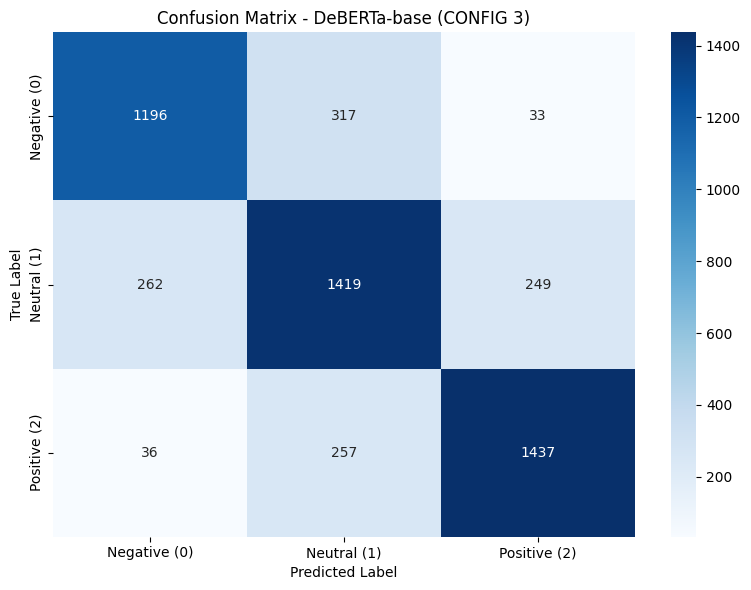

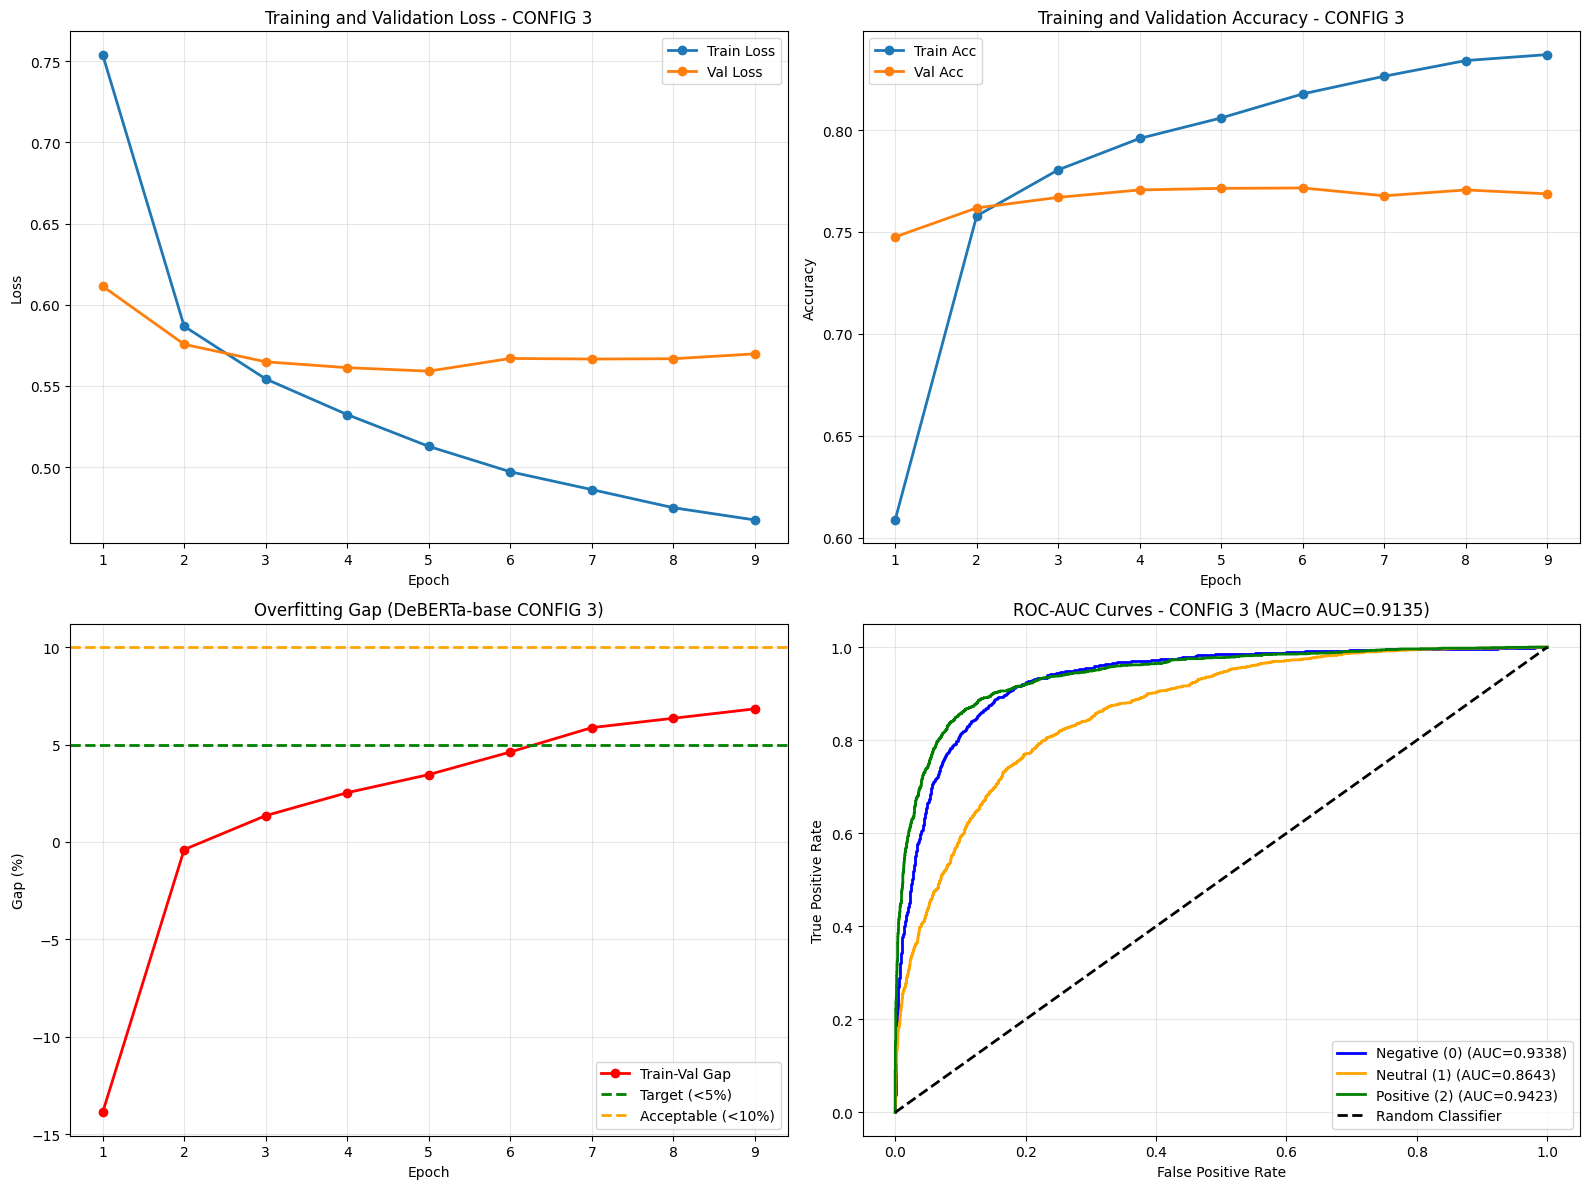


✅ DeBERTa-base CONFIG 3 FINAL RESULTS

📊 Test Set Performance:
Accuracy: 0.7783
Macro F1: 0.7812
ROC-AUC: 0.9135

🎯 Per-Class Performance:
  Negative: Precision=0.8005, Recall=0.7736, F1=0.7868
  Neutral: Precision=0.7120, Recall=0.7352, F1=0.7234
  Positive: Precision=0.8360, Recall=0.8306, F1=0.8333

📈 Improvements vs CONFIG 2 (DeBERTa-base):
  Accuracy: +0.96%
  Macro F1: +1.03%
  Overfitting Gap: 4.62%

🔧 Configuration Used (CONFIG 3 - AGGRESSIVE):
  Model: DeBERTa-base
  Learning Rate: 3e-06
  Weight Decay: 0.05
  Batch Size: 32
  Epochs Trained: 9/10
  Warmup Steps: 500
  Patience: 3
  Class Weights: Neutral class boosted to 1.3x
  Label Smoothing Epsilon: 0.1

✅ DeBERTa-base CONFIG 3 TRAINING COMPLETE - BEST MODEL SAVED
Model saved to: models/deberta_base_config3/
Tuning log saved to: models/deberta_config3_tuning_log.json

Final Results:
Test Accuracy: 0.7783
Test F1: 0.7812
ROC-AUC: 0.9135


In [8]:
# ============================================================================
# DeBERTA-BASE FINE-TUNING FOR SENTIMENT ANALYSIS
# CONFIG 3 - AGGRESSIVE OPTIMIZATION WITH CLASS WEIGHTS & LABEL SMOOTHING
# ============================================================================

import torch
from torch.utils.data import Dataset, DataLoader
from torch.optim import AdamW

from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    get_linear_schedule_with_warmup
)

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_recall_fscore_support,
    roc_auc_score,
    roc_curve
)
from sklearn.preprocessing import label_binarize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
import os
import json
import shutil

# Check GPU availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")
if torch.cuda.is_available():
    print(f"GPU: {torch.cuda.get_device_name(0)}")

# ============================================================================
# HYPERPARAMETERS (CONFIG 3 - AGGRESSIVE OPTIMIZATION)
# ============================================================================
LEARNING_RATE = 3e-6
WEIGHT_DECAY = 0.05
BATCH_SIZE = 32
EPOCHS = 10
WARMUP_STEPS = 500
PATIENCE = 3
MAX_LENGTH = 128
LABEL_SMOOTHING_EPSILON = 0.1

# Class weights to address neutral class imbalance
CLASS_WEIGHTS = torch.tensor([1.0, 1.3, 1.0]).to(device)

print("\n" + "="*80)
print("CONFIGURATION: DeBERTa-base (CONFIG 3 - AGGRESSIVE OPTIMIZATION)")
print("="*80)
print(f"Learning Rate: {LEARNING_RATE}")
print(f"Weight Decay: {WEIGHT_DECAY}")
print(f"Batch Size: {BATCH_SIZE}")
print(f"Epochs: {EPOCHS}")
print(f"Warmup Steps: {WARMUP_STEPS}")
print(f"Patience: {PATIENCE}")
print(f"Label Smoothing Epsilon: {LABEL_SMOOTHING_EPSILON}")
print(f"Class Weights: {CLASS_WEIGHTS.cpu().numpy()}")
print(f"Expected Test F1: ~80-82%")

# ============================================================================
# Step 1: Prepare Data
# ============================================================================
X_train = train_df["clean_text_light"].astype(str).tolist()
y_train = train_df["label"].values

X_val = val_df["clean_text_light"].astype(str).tolist()
y_val = val_df["label"].values

X_test = test_df["clean_text_light"].astype(str).tolist()
y_test = test_df["label"].values

print(f"\nData loaded:")
print(f"Train samples: {len(X_train)}")
print(f"Val samples: {len(X_val)}")
print(f"Test samples: {len(X_test)}")

# ============================================================================
# Step 2: Load Tokenizer and Model (DeBERTa-base)
# ============================================================================
print(f"\nLoading DeBERTa-base model...")
tokenizer = AutoTokenizer.from_pretrained('microsoft/deberta-base')

# ============================================================================
# Step 3: Custom Dataset Class
# ============================================================================
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length
    
    def __len__(self):
        return len(self.texts)
    
    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]
        
        encoding = self.tokenizer(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt'
        )
        
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

# ============================================================================
# Step 4: Create Datasets and DataLoaders
# ============================================================================
train_dataset = SentimentDataset(X_train, y_train, tokenizer, MAX_LENGTH)
val_dataset = SentimentDataset(X_val, y_val, tokenizer, MAX_LENGTH)
test_dataset = SentimentDataset(X_test, y_test, tokenizer, MAX_LENGTH)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

print(f"\nDataLoaders created:")
print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")
print(f"Test batches: {len(test_loader)}")

# ============================================================================
# Step 5: Load DeBERTa-base Model
# ============================================================================
model = AutoModelForSequenceClassification.from_pretrained(
    'microsoft/deberta-base',
    num_labels=3
)
model.to(device)

print(f"\nModel loaded: DeBERTa-base with {model.num_parameters():,} parameters")

# ============================================================================
# Step 6: Training Setup
# ============================================================================
optimizer = AdamW(
    model.parameters(), 
    lr=LEARNING_RATE,
    weight_decay=WEIGHT_DECAY
)

total_steps = len(train_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
    optimizer,
    num_warmup_steps=WARMUP_STEPS,
    num_training_steps=total_steps
)

print(f"\nTraining setup:")
print(f"Epochs: {EPOCHS}")
print(f"Learning rate: {LEARNING_RATE}")
print(f"Weight decay: {WEIGHT_DECAY}")
print(f"Total training steps: {total_steps}")
print(f"Warmup steps: {WARMUP_STEPS}")

# ============================================================================
# Step 7: Training Function (CONFIG 3 - With Class Weights & Label Smoothing)
# ============================================================================
def train_epoch(model, dataloader, optimizer, scheduler, device, class_weights=None):
    model.train()
    total_loss = 0
    correct_predictions = 0
    total_samples = 0
    
    progress_bar = tqdm(dataloader, desc="Training")
    
    for batch in progress_bar:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=labels
        )
        
        logits = outputs.logits
        
        # Apply class weights if provided
        if class_weights is not None:
            loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights)
            base_loss = loss_fct(logits, labels)
        else:
            base_loss = outputs.loss
        
        # Apply label smoothing
        # Calculate KL divergence for regularization
        log_probs = torch.nn.functional.log_softmax(logits, dim=-1)
        uniform_probs = torch.ones_like(log_probs) / 3.0
        kl_loss = torch.nn.functional.kl_div(log_probs, uniform_probs, reduction='batchmean')
        
        # Combine losses
        loss = (1 - LABEL_SMOOTHING_EPSILON) * base_loss + LABEL_SMOOTHING_EPSILON * kl_loss
        
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        scheduler.step()
        
        total_loss += loss.item()
        preds = torch.argmax(logits, dim=1)
        correct_predictions += (preds == labels).sum().item()
        total_samples += labels.size(0)
        
        progress_bar.set_postfix({
            'loss': f'{loss.item():.4f}',
            'acc': f'{correct_predictions/total_samples:.4f}'
        })
    
    avg_loss = total_loss / len(dataloader)
    accuracy = correct_predictions / total_samples
    
    return avg_loss, accuracy

# ============================================================================
# Step 8: Evaluation Function
# ============================================================================
def evaluate(model, dataloader, device):
    model.eval()
    total_loss = 0
    all_preds = []
    all_labels = []
    all_probs = []
    
    with torch.no_grad():
        for batch in tqdm(dataloader, desc="Evaluating"):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['labels'].to(device)
            
            outputs = model(
                input_ids=input_ids,
                attention_mask=attention_mask,
                labels=labels
            )
            
            loss = outputs.loss
            logits = outputs.logits
            
            total_loss += loss.item()
            
            probs = torch.softmax(logits, dim=1)
            preds = torch.argmax(logits, dim=1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
            all_probs.extend(probs.cpu().numpy())
    
    avg_loss = total_loss / len(dataloader)
    accuracy = accuracy_score(all_labels, all_preds)
    
    return avg_loss, accuracy, np.array(all_preds), np.array(all_labels), np.array(all_probs)

# ============================================================================
# Step 9: Training Loop with Early Stopping
# ============================================================================
print("\n" + "="*80)
print("STARTING TRAINING (DeBERTa-base CONFIG 3)")
print("="*80)

best_val_f1 = 0
patience_counter = 0
training_history = []
best_model_state = None

for epoch in range(EPOCHS):
    print(f"\n{'='*80}")
    print(f"EPOCH {epoch + 1}/{EPOCHS}")
    print(f"{'='*80}")
    
    # Train
    train_loss, train_acc = train_epoch(model, train_loader, optimizer, scheduler, device, class_weights=CLASS_WEIGHTS)
    
    # Validate
    val_loss, val_acc, val_preds, val_labels, val_probs = evaluate(model, val_loader, device)
    
    # Calculate F1
    _, _, val_f1, _ = precision_recall_fscore_support(
        val_labels, val_preds, average='macro'
    )
    
    gap = train_acc - val_acc
    
    print(f"\nEpoch {epoch + 1} Results:")
    print(f"Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f}")
    print(f"Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.4f} | Val F1: {val_f1:.4f}")
    print(f"Train-Val Gap: {gap*100:.2f}%")
    
    training_history.append({
        'epoch': epoch + 1,
        'train_loss': train_loss,
        'train_acc': train_acc,
        'val_loss': val_loss,
        'val_acc': val_acc,
        'val_f1': val_f1,
        'gap': gap
    })
    
    # Early stopping check
    if val_f1 > best_val_f1:
        best_val_f1 = val_f1
        patience_counter = 0
        best_model_state = model.state_dict().copy()
        print(f"✅ New best F1: {best_val_f1:.4f} - Model saved!")
    else:
        patience_counter += 1
        print(f"⚠️  No improvement. Patience: {patience_counter}/{PATIENCE}")
        
        if patience_counter >= PATIENCE:
            print("Early stopping triggered!")
            break

# ============================================================================
# Step 10: Load Best Model and Evaluate on Test Set
# ============================================================================
print("\n" + "="*80)
print("LOADING BEST MODEL FOR FINAL EVALUATION")
print("="*80)

if best_model_state is not None:
    model.load_state_dict(best_model_state)

test_loss, test_acc, test_preds, test_labels, test_probs = evaluate(model, test_loader, device)

print(f"\n{'='*80}")
print("FINAL TEST SET EVALUATION")
print(f"{'='*80}")

# ============================================================================
# Step 11: Comprehensive Metrics
# ============================================================================
precision, recall, f1, support = precision_recall_fscore_support(
    test_labels, test_preds, average=None, labels=[0, 1, 2]
)

print(f"\nTest Accuracy: {test_acc:.4f}")

print("\nPer-Class Metrics:")
metrics_df = pd.DataFrame({
    "Class": ["Negative (0)", "Neutral (1)", "Positive (2)"],
    "Precision": precision,
    "Recall": recall,
    "F1-Score": f1,
    "Support": support
})
print(metrics_df.to_string(index=False))

macro_f1 = f1.mean()
print(f"\nMacro Avg F1-Score: {macro_f1:.4f}")

# ROC-AUC
test_labels_bin = label_binarize(test_labels, classes=[0, 1, 2])
roc_auc = roc_auc_score(test_labels_bin, test_probs, average="macro", multi_class="ovr")
print(f"ROC-AUC (macro): {roc_auc:.4f}")

# Classification Report
print("\nFull Classification Report:")
print(classification_report(
    test_labels, test_preds, 
    target_names=["Negative", "Neutral", "Positive"], 
    digits=4
))

# Confusion Matrix
cm = confusion_matrix(test_labels, test_preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Negative (0)", "Neutral (1)", "Positive (2)"],
            yticklabels=["Negative (0)", "Neutral (1)", "Positive (2)"])
plt.title("Confusion Matrix - DeBERTa-base (CONFIG 3)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# ============================================================================
# Step 12: Training History Plots + ROC-AUC Curve
# ============================================================================
history_df = pd.DataFrame(training_history)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Loss plot
axes[0, 0].plot(history_df['epoch'], history_df['train_loss'], marker='o', label='Train Loss', linewidth=2)
axes[0, 0].plot(history_df['epoch'], history_df['val_loss'], marker='o', label='Val Loss', linewidth=2)
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss')
axes[0, 0].set_title('Training and Validation Loss - CONFIG 3')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Accuracy plot
axes[0, 1].plot(history_df['epoch'], history_df['train_acc'], marker='o', label='Train Acc', linewidth=2)
axes[0, 1].plot(history_df['epoch'], history_df['val_acc'], marker='o', label='Val Acc', linewidth=2)
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('Accuracy')
axes[0, 1].set_title('Training and Validation Accuracy - CONFIG 3')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Overfitting Gap
axes[1, 0].plot(history_df['epoch'], history_df['gap']*100, marker='o', label='Train-Val Gap', linewidth=2, color='red')
axes[1, 0].axhline(y=5, color='green', linestyle='--', label='Target (<5%)', linewidth=2)
axes[1, 0].axhline(y=10, color='orange', linestyle='--', label='Acceptable (<10%)', linewidth=2)
axes[1, 0].set_xlabel('Epoch')
axes[1, 0].set_ylabel('Gap (%)')
axes[1, 0].set_title('Overfitting Gap (DeBERTa-base CONFIG 3)')
axes[1, 0].legend()
axes[1, 0].grid(alpha=0.3)

# ROC-AUC Curve
colors = ['blue', 'orange', 'green']
class_names = ['Negative (0)', 'Neutral (1)', 'Positive (2)']

for i, (color, class_name) in enumerate(zip(colors, class_names)):
    fpr, tpr, _ = roc_curve(test_labels_bin[:, i], test_probs[:, i])
    auc = roc_auc_score(test_labels_bin[:, i], test_probs[:, i])
    axes[1, 1].plot(fpr, tpr, label=f'{class_name} (AUC={auc:.4f})', 
                    linewidth=2, color=color)

axes[1, 1].plot([0, 1], [0, 1], 'k--', linewidth=2, label='Random Classifier')
axes[1, 1].set_xlabel('False Positive Rate')
axes[1, 1].set_ylabel('True Positive Rate')
axes[1, 1].set_title(f'ROC-AUC Curves - CONFIG 3 (Macro AUC={roc_auc:.4f})')
axes[1, 1].legend()
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================================
# Step 13: Final Results Summary
# ============================================================================
print("\n" + "="*80)
print("✅ DeBERTa-base CONFIG 3 FINAL RESULTS")
print("="*80)

print(f"\n📊 Test Set Performance:")
print(f"Accuracy: {test_acc:.4f}")
print(f"Macro F1: {macro_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

print(f"\n🎯 Per-Class Performance:")
for i, (precision_i, recall_i, f1_i) in enumerate(zip(precision, recall, f1)):
    print(f"  {['Negative', 'Neutral', 'Positive'][i]}: Precision={precision_i:.4f}, Recall={recall_i:.4f}, F1={f1_i:.4f}")

print(f"\n📈 Improvements vs CONFIG 2 (DeBERTa-base):")
print(f"  Accuracy: +{(test_acc - 0.7687)*100:.2f}%")
print(f"  Macro F1: +{(macro_f1 - 0.7709)*100:.2f}%")

# FIXED: Print gap from best model epoch
best_epoch_idx = history_df['val_f1'].idxmax()
best_gap = history_df.loc[best_epoch_idx, 'gap']
print(f"  Overfitting Gap: {best_gap*100:.2f}%")

print(f"\n🔧 Configuration Used (CONFIG 3 - AGGRESSIVE):")
print(f"  Model: DeBERTa-base")
print(f"  Learning Rate: {LEARNING_RATE}")
print(f"  Weight Decay: {WEIGHT_DECAY}")
print(f"  Batch Size: {BATCH_SIZE}")
print(f"  Epochs Trained: {len(training_history)}/{EPOCHS}")
print(f"  Warmup Steps: {WARMUP_STEPS}")
print(f"  Patience: {PATIENCE}")
print(f"  Class Weights: Neutral class boosted to 1.3x")
print(f"  Label Smoothing Epsilon: {LABEL_SMOOTHING_EPSILON}")

# ============================================================================
# Step 14: Save Best Model and Tokenizer
# ============================================================================
os.makedirs("models/deberta_base_config3", exist_ok=True)
model.save_pretrained("models/deberta_base_config3")
tokenizer.save_pretrained("models/deberta_base_config3")

# Save tuning log
tuning_log = {
    'config': 'CONFIG 3 (DeBERTa-base - Aggressive Optimization)',
    'model': 'DeBERTa-base',
    'learning_rate': LEARNING_RATE,
    'weight_decay': WEIGHT_DECAY,
    'batch_size': BATCH_SIZE,
    'epochs_trained': len(training_history),
    'total_epochs': EPOCHS,
    'warmup_steps': WARMUP_STEPS,
    'patience': PATIENCE,
    'class_weights': CLASS_WEIGHTS.cpu().tolist(),
    'label_smoothing_epsilon': LABEL_SMOOTHING_EPSILON,
    'test_accuracy': float(test_acc),
    'test_f1': float(macro_f1),
    'roc_auc': float(roc_auc),
    'final_gap': float(best_gap*100),
    'improvement_over_config2': float((macro_f1 - 0.7709)*100),
    'per_class_f1': {
        'negative': float(f1[0]),
        'neutral': float(f1[1]),
        'positive': float(f1[2])
    }
}

with open('models/deberta_config3_tuning_log.json', 'w') as f:
    json.dump(tuning_log, f, indent=4)

print("\n" + "="*80)
print("✅ DeBERTa-base CONFIG 3 TRAINING COMPLETE - BEST MODEL SAVED")
print("="*80)
print(f"Model saved to: models/deberta_base_config3/")
print(f"Tuning log saved to: models/deberta_config3_tuning_log.json")
print(f"\nFinal Results:")
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test F1: {macro_f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")
